# K-Nearest Neighbors

KNN is a **non-parametric** algorithm used for classification and regression tasks.
It works by finding the K closest data points in the training set to a new data point
 and assigning the new point the class label that is most common among the K neighbors.

In other words, KNN determines the class of an unknown data point by finding the k
data points in the training dataset that are closest to the unknown data point, and
classifying the unknown data point based on the most common class among its k-nearest
 neighbors.

The distance metric used to determine the proximity between two data points can be
Euclidean, Manhattan, or any other metric of choice.

The KNN algorithm can be summarized as follows:

- Calculate the distance between the query point and all the data points in the dataset.

- Select the k-nearest data points to the query point.

- Assign the class of the query point based on the majority class among the k-nearest
neighbors.

In [27]:
import warnings
warnings.filterwarnings('ignore')

# Set up notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home_directory = "C:/Users/rober/DataspellProjects/Machine-Learning-Sandbox"

pokedex = pd.read_csv(
    filepath_or_buffer=home_directory + "/data/01_pokemon/pokemon_go.csv"
)

# Features (numpy arrays)
X = pokedex[["MaxHP", "Capture_rate"]].values
# Target variable (numpy arrays)
y = pokedex[["Legendary"]].values

print(X.shape, y.shape)

(649, 2) (649, 1)


## Split the dataset

First, we are splitting our data into training and testing sets using
`train_test_split()` function from scikit-learn library. The `stratify` parameter
ensures that the proportion of classes in the training and testing sets remains the
same as in the original dataset. This is useful to make sure we are not biased
towards one class during training.

In [28]:
# Train/Test Split
from sklearn.model_selection import train_test_split

# We use 'stratify' to represent the same proportion of labels on the test and the train
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=21, stratify=y
)

Here `X` is the feature matrix and `y` is the target variable. `test_size=0.2`
specifies that we want to use 20% of the data for testing, while the remaining 80%
will be used for training. The `random_state` parameter is used to ensure
reproducibility, while `stratify=y` ensures that the classes are proportionally
represented in the train-test split.

## Create dummy variables

In order to use categorical features, we should use a dummy variable encoders to proceed

In [29]:
X = pokedex[["MaxHP", "Capture_rate"]]

primary_types = pd.get_dummies(pokedex['Primary'], drop_first=True)

pokedex_X = pd.concat([X, primary_types], axis=1)

X = pokedex_X.values

In [30]:
pokedex_X.head()

,MaxHP,Capture_rate,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,113,0.20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,134,0.10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,162,0.05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,105,0.20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,131,0.10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0




## Standardize the data

KNN is a distance-based algorithm, which means that it is sensitive to the scale of
the features. Therefore, it is a good practice to standardize the data so that each
feature has a mean of 0 and standard deviation of 1. We can use the `StandardScaler`
function from scikit-learn to standardize the data.


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

Once the data is preprocessed, we can train the KNN model on the training set. We can
 use the `KNeighborsClassifier` class from scikit-learn to train the model.

Here, we are instantiating the `KNeighborsClassifier` class from scikit-learn and
setting the number of neighbors to 10.

We need to specify the value of k and the distance metric that we want to use to
calculate the distance between data points. For example, Euclidean distance is a
common distance metric used in K-NN. The following code shows how to train a K-NN
classifier using scikit-learn:

In [32]:
# Instantiate classifier
from sklearn.neighbors import KNeighborsClassifier

k = 10
dist_metric = 'euclidean'

knn = KNeighborsClassifier(n_neighbors=k, metric=dist_metric)

We then fit our model on the training data using the `fit()` function.

In [33]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

## Evaluate the model

We calculate the accuracy of our model using the `score()` function on our test data.

In [34]:
accuracy = knn.score(X_test_scaled, y_test)

not_legendary = pokedex.groupby("Legendary")["Legendary"].count()[0]
legendary = pokedex.groupby("Legendary")["Legendary"].count()[1]

print(f"Accuracy : {accuracy}, Ratio: {not_legendary/(legendary+not_legendary)}")

Accuracy : 0.9384615384615385, Ratio: 0.9399075500770416


Notice that the accuracy is low considering that 93% of the labels are from not
legendary Pokemons.

- Larger k -> less complex model -> can cause underfitting
- Smaller k -> more complex model -> can lead to overfitting

## Bootstrapping

Next, we perform a bootstrap by training multiple models with different numbers of
neighbors and calculate the training and testing accuracies for each model.

In [35]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 30)

for neighbor in neighbors:
    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Fit
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)
    # Evaluate
    train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
    test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)

print(
    f"Neighbors: {neighbors} \n Train accuracies: {train_accuracies} \n Test "
    f"accuracies: {test_accuracies}"
)

Neighbors: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 
 Train accuracies: {1: 0.9903660886319846, 2: 0.9845857418111753, 3: 0.9845857418111753, 4: 0.9749518304431599, 5: 0.9788053949903661, 6: 0.976878612716763, 7: 0.976878612716763, 8: 0.9710982658959537, 9: 0.9749518304431599, 10: 0.9653179190751445, 11: 0.9653179190751445, 12: 0.9653179190751445, 13: 0.9653179190751445, 14: 0.9614643545279383, 15: 0.9556840077071291, 16: 0.9518304431599229, 17: 0.9518304431599229, 18: 0.9576107899807321, 19: 0.9518304431599229, 20: 0.9518304431599229, 21: 0.9441233140655106, 22: 0.9576107899807321, 23: 0.9499036608863198, 24: 0.9556840077071291, 25: 0.9479768786127167, 26: 0.9479768786127167, 27: 0.9479768786127167, 28: 0.9556840077071291, 29: 0.9499036608863198} 
 Test accuracies: {1: 0.9692307692307692, 2: 0.9538461538461539, 3: 0.9538461538461539, 4: 0.9538461538461539, 5: 0.9538461538461539, 6: 0.9615384615384616, 7: 0.9615384615384616, 8: 0.9615384

Here, `np.arange` creates a range of numbers, which are the values we want to test
for the number of neighbors in our KNN model. We then loop through each value of
neighbor and fit a new `KNeighborsClassifier` model with that value. We then
calculate and store the training and testing accuracies for each model.

Look at the next plot, on the Testing Accuracy **as k increases beyond `7` we see
a significant "underfitting" where performance decrease on both test and training sets,
 as indicated in this plot**.

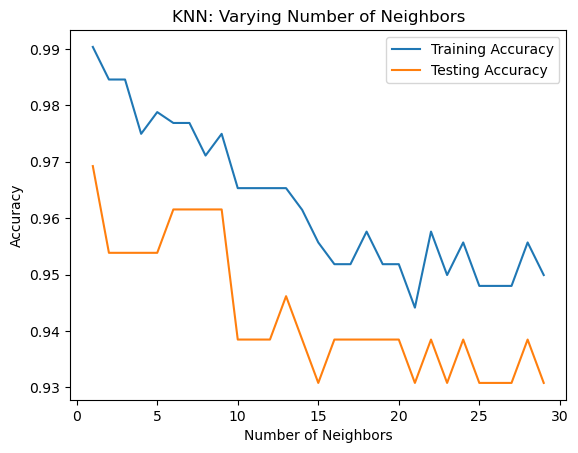

In [36]:
plt.figure()
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.title("KNN: Varying Number of Neighbors")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# GridSearchCV: Hyperparameter Tuning

In this step, we tune the hyperparameters of the KNN classifier to obtain better
performance.

To tune the hyperparameters using grid search cross-validation. This is done by
creating an instance of the `GridSearchCV` class and passing the `KNeighborsClassifier()`
 estimator, the param_grid dictionary, and the number of **folds** `(cv=5)` to the
 constructor. The `fit()` method of the grid_search object is then called on the
 training set `(X_train_scaled, y_train)` to train and validate the model with
 different hyperparameters.

Also is important to consider the next scores, in order to let the GridSearch select
the best parameters:

- 'accuracy': This is the default scoring parameter, and it measures the fraction of
correctly classified samples.
- 'precision': Precision is the fraction of true positives among the predicted positives.
- 'recall': Recall is the fraction of true positives among the actual positives.
- 'f1': F1 score is the harmonic mean of precision and recall. It is a balanced
measure that takes into account both precision and recall.
- 'roc_auc': Area under the receiver operating characteristic (ROC) curve. It
measures the ability of the model to discriminate between positive and negative samples.

In [37]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune
param_grid = {'n_neighbors': np.arange(1, 30),
              'metric': ['cosine', 'euclidean', 'manhattan'],
              'n_jobs': [-1],
              'weights': ['uniform', 'distance']}

# Create 5 K-Fold instance to split the data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Tune the hyperparameters using grid search
scoring = {'accuracy': None, 'f1': None, 'precision': None, 'recall': None, 'roc_auc': None}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kf,
                           scoring='f1')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['cosine', 'euclidean', 'manhattan'],
                         'n_jobs': [-1],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

However, this is computationally expensive, to perform the last Hyperparameter search
 we CPU did:

- 5 fold cross-validation, 2 hyperparameters ~2,500 values = 25,000 fits to evaluate

For this reason we can also do the next

# RandomSearchCV: Hyperparameter Tuning

Here we can set a `n_iter` argument to limit the number to hyperparameters to evaluate


In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Tune the hyperparameters using grid search
grid_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, cv=kf)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the KNN classifier using the best hyperparameters
knn_best = grid_search.best_estimator_
knn_best.fit(X_train_scaled, y_train)

# Evaluate the performance of the KNN classifier with the best hyperparameters
y_pred = knn_best.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparameters:", accuracy)


Best hyperparameters: {'weights': 'distance', 'n_neighbors': 23, 'n_jobs': -1, 'metric': 'manhattan'}
Accuracy with best hyperparameters: 0.9615384615384616


## References

As a reference from the transcript of the CS 229S Stanford Machine Learning course
transcript notes on K-Nearest Neighbors.